# Biofeedback 0

Plotting data collected from Mbienlab IMUs:

<ul>
    <li> accelerometer ($\mathrm{m}^2/\mathrm{s}$)</li>
    <li> gyroscope ($\mathrm{rad/s}$)</li>
    <li> magnetometer ($\mathrm{T}$)</li>
</ul>


In [3]:

%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py

import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

In [4]:
import pandas as pd
from pandas import Series

R02acc = pd.read_csv("data/walk000/R02_2018-10-24T18.50.04.541_CEC8F444C813_Accelerometer.csv",header=0,date_parser=[1])
R03acc = pd.read_csv("data/walk000/R03_2018-10-24T18.50.04.541_D09BD2CB4836_Accelerometer.csv",header=0,date_parser=[1])
R04acc = pd.read_csv("data/walk000/R04_2018-10-24T18.50.04.541_FEDF3D7FC6E4_Accelerometer.csv",header=0,date_parser=[1])

In [5]:
R02acc.columns

Index(['epoc (ms)', 'timestamp (-0400)', 'elapsed (s)', 'x-axis (g)',
       'y-axis (g)', 'z-axis (g)'],
      dtype='object')

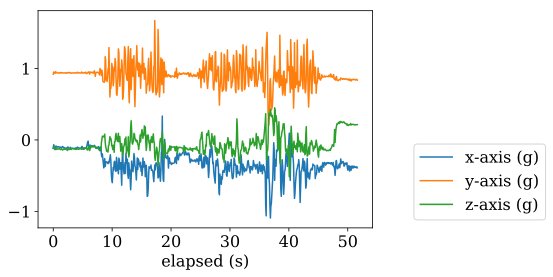

In [9]:

ax = R02acc.plot(x='elapsed (s)',y='x-axis (g)')
R02acc.plot(ax = ax, x='elapsed (s)',y='y-axis (g)')
R02acc.plot(ax = ax, x='elapsed (s)',y='z-axis (g)')
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)

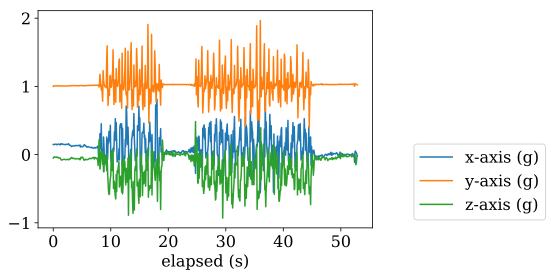

In [10]:
ax = R03acc.plot(x='elapsed (s)',y='x-axis (g)')
R03acc.plot(ax = ax, x='elapsed (s)',y='y-axis (g)')
R03acc.plot(ax = ax, x='elapsed (s)',y='z-axis (g)')
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)

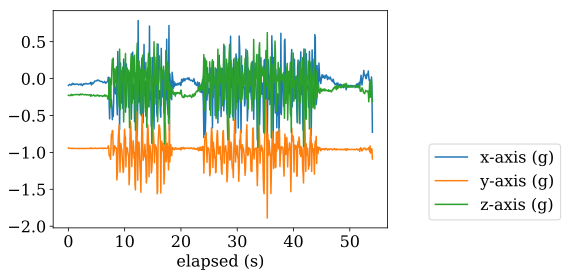

In [11]:
ax = R04acc.plot(x='elapsed (s)',y='x-axis (g)')
R04acc.plot(ax = ax, x='elapsed (s)',y='y-axis (g)')
R04acc.plot(ax = ax, x='elapsed (s)',y='z-axis (g)')
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)

In [13]:
R02gyro = pd.read_csv("data/walk000/R02_2018-10-24T18.50.04.541_CEC8F444C813_Gyroscope.csv",header=0,date_parser=[1])
R03gyro = pd.read_csv("data/walk000/R03_2018-10-24T18.50.04.541_D09BD2CB4836_Gyroscope.csv",header=0,date_parser=[1])
R04gyro = pd.read_csv("data/walk000/R04_2018-10-24T18.50.04.541_FEDF3D7FC6E4_Gyroscope.csv",header=0,date_parser=[1])

In [14]:
R02gyro.columns

Index(['epoc (ms)', 'timestamp (-0400)', 'elapsed (s)', 'x-axis (deg/s)',
       'y-axis (deg/s)', 'z-axis (deg/s)'],
      dtype='object')

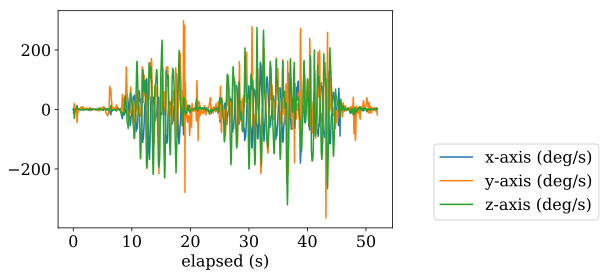

In [15]:
ax = R02gyro.plot(x='elapsed (s)',y='x-axis (deg/s)')
R02gyro.plot(ax = ax, x='elapsed (s)',y='y-axis (deg/s)')
R02gyro.plot(ax = ax, x='elapsed (s)',y='z-axis (deg/s)')
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)

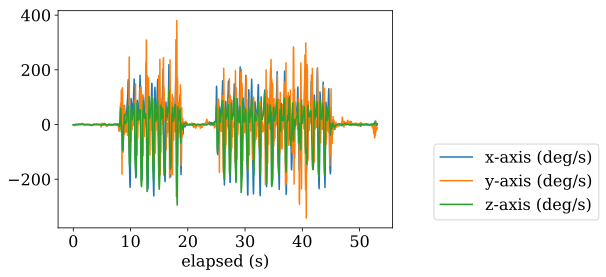

In [16]:
ax = R03gyro.plot(x='elapsed (s)',y='x-axis (deg/s)')
R03gyro.plot(ax = ax, x='elapsed (s)',y='y-axis (deg/s)')
R03gyro.plot(ax = ax, x='elapsed (s)',y='z-axis (deg/s)')
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)

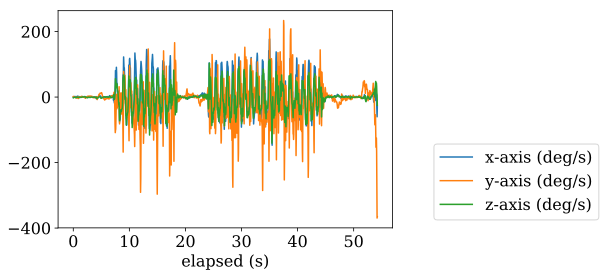

In [18]:
ax = R04gyro.plot(x='elapsed (s)',y='x-axis (deg/s)')
R04gyro.plot(ax = ax, x='elapsed (s)',y='y-axis (deg/s)')
R04gyro.plot(ax = ax, x='elapsed (s)',y='z-axis (deg/s)')
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)

In [22]:
timeaccR02 = R02acc['elapsed (s)'][:]
accmagR02 = np.sqrt(R02acc['x-axis (g)'][:]**2 + R02acc['y-axis (g)'][:]**2 + R02acc['z-axis (g)'][:]**2)
timeaccR03 = R03acc['elapsed (s)'][:]
accmagR03 = np.sqrt(R03acc['x-axis (g)'][:]**2 + R03acc['y-axis (g)'][:]**2 + R03acc['z-axis (g)'][:]**2)


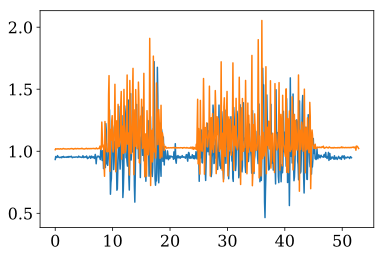

In [23]:
plt.plot(timeaccR02,accmagR02)
plt.plot(timeaccR03,accmagR03)

In [24]:
R02mag = pd.read_csv("data/walk000/R02_2018-10-24T18.50.04.541_CEC8F444C813_Magnetometer.csv",header=0,date_parser=[1])

In [25]:
R02mag.columns

Index(['epoc (ms)', 'timestamp (-0400)', 'elapsed (s)', 'x-axis (T)',
       'y-axis (T)', 'z-axis (T)'],
      dtype='object')

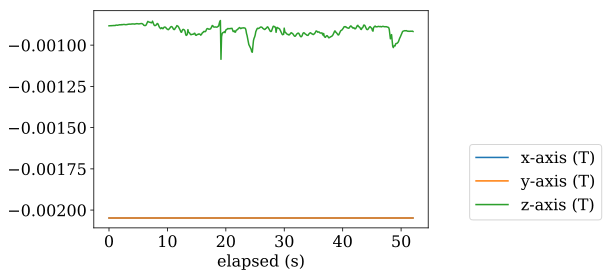

In [31]:
ax = R02mag.plot(x ='elapsed (s)', y = 'x-axis (T)' )
R02mag.plot(ax = ax, x ='elapsed (s)', y = 'y-axis (T)' )
R02mag.plot(ax = ax, x ='elapsed (s)', y = 'z-axis (T)' )
plt.legend(loc = 3, bbox_to_anchor = [1.1,0.], ncol = 1, fancybox = True, shadow = False)